In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import datetime
import re

In [2]:
df = pd.read_csv("Amazon_dep2_all.csv")
df.head()

,all_rank,dep_rank,format,department,title,before_discount,new_price,scrape_time,other_list
0,"#30,397",#1,Audio CD,Special Features Stores | 34875086-8a6a-4dfe-b...,The Adventure Begins: The Early Classics (Adve...,_,$15.23,2024-04-11 23:08:05.609874,Publisher:Tyndale Entertainment; Abridged ed...
1,"#54,341",#2,1st Edition,Special Features Stores | 34875086-8a6a-4dfe-b...,Spanish For Dummies Audio Set,$22.99,$12.28 - $17.84,2024-04-11 23:08:15.497661,Publisher:For Dummies; 1st edition (April 30...
2,"#29,496",#3,Audio CD,Special Features Stores | 34875086-8a6a-4dfe-b...,"28 Hours: 6 stories on Trust, Truth, and Disce...",$14.99,$10.99,2024-04-11 23:08:24.228518,"Publisher:Focus on the Family (October 4, 20..."
3,"#43,543",#4,Audio CD,Special Features Stores | 34875086-8a6a-4dfe-b...,24K Magic,$13.98,$10.49,2024-04-11 23:08:32.071115,ASIN:B01LYRM74T Publisher:Atlantic (Januar...
4,#5,#5,Kindle Edition,Special Features Stores | 34875086-8a6a-4dfe-b...,The Women: A Novel,_,$14.99 (function(f) {var _np=(window.P._names...,2024-04-11 23:08:46.121043,ASIN:B0C1X97LW7 Publisher:St. Martin's Pre...


In [3]:
df.groupby('department').count()

,all_rank,dep_rank,format,title,before_discount,new_price,scrape_time,other_list
department,,,,,,,,
Arts & Photography | Architecture,187,193,193,193,193,193,193,193
Arts & Photography | BBusiness of Art,176,185,185,185,185,185,185,185
"Arts & Photography | Collections, Catalogs & Exhibition",127,129,129,129,129,129,129,129
Arts & Photography | Decorative Arts & Design,170,172,172,172,172,172,172,172
Arts & Photography | Drawing,186,186,186,186,186,186,186,186
...,...,...,...,...,...,...,...,...
Travel | Reference,133,134,134,134,134,134,134,134
Travel | South America,186,188,188,188,188,188,188,188
Travel | Specialty Travel,172,172,172,172,172,172,172,172


In [4]:
dep1 = []
dep2 = []
for dep in df['department']:
    _ = re.split(r"\|",dep)
    
    try:
        dep1.append( _[0] )
    except IndexError:
        dep1.append(None)
        dep2.append(None)
        pass
    
    try:
        dep2.append(_[1])
    except IndexError:
        dep2.append(None)
        pass

df['department1'] = dep1
df['department2'] = dep2
    
    

In [5]:
originPrice = []
newPrice = []
for index,row in df.iterrows():
    orp = row['before_discount']
    orp = re.sub(r'[^0-9.]', '', orp)
    originPrice.append(orp)
    nep = row['new_price']
    nep = re.sub(r'[^0-9.]','',nep)
    newPrice.append(nep)


originPrice = pd.to_numeric(originPrice,errors='coerce')
newPrice = pd.to_numeric(newPrice,errors='coerce')
df['originalPrice'] = originPrice
df['newPrice'] = newPrice
df['discount'] = newPrice/originPrice

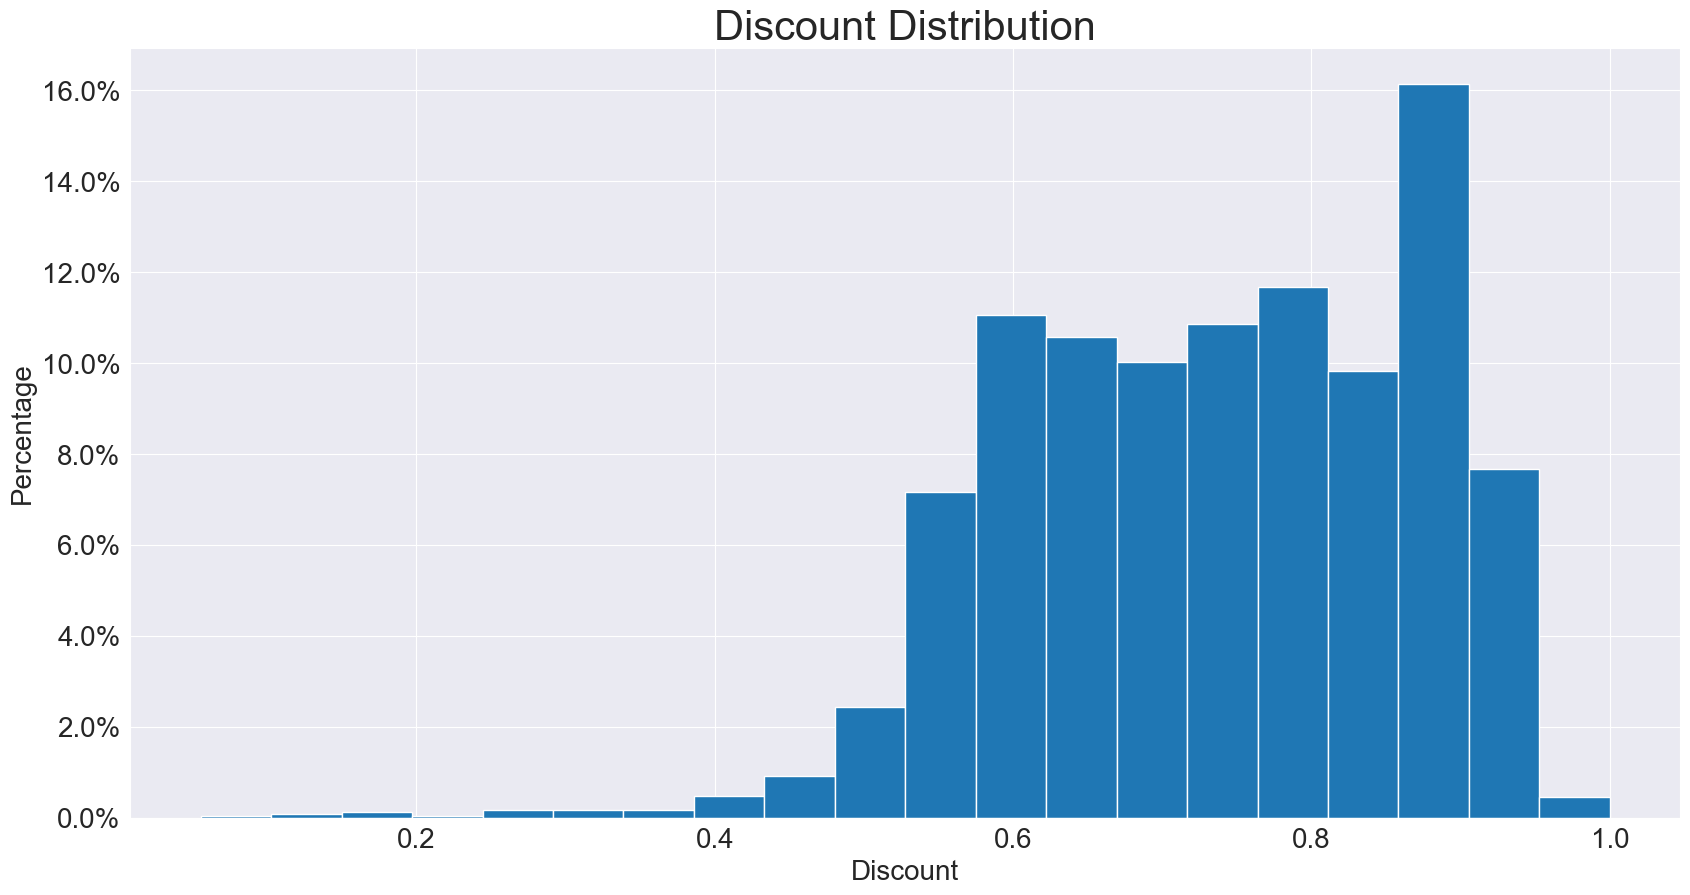

In [6]:
df = df[df['format'] == 'Paperback']
# Ensure 'discount' column is of type float
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

plt.figure(figsize=(20, 10))
plt.hist(df[df['discount'] <= 1]['discount'], weights=np.ones(len(df[df['discount'] <= 1])) / len(df[df['discount'] <= 1]),bins = 20)
plt.title("Discount Distribution", fontsize=30)
plt.xlabel("Discount", fontsize=20)
plt.ylabel("Percentage", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('./pics/discount_distribution.png')

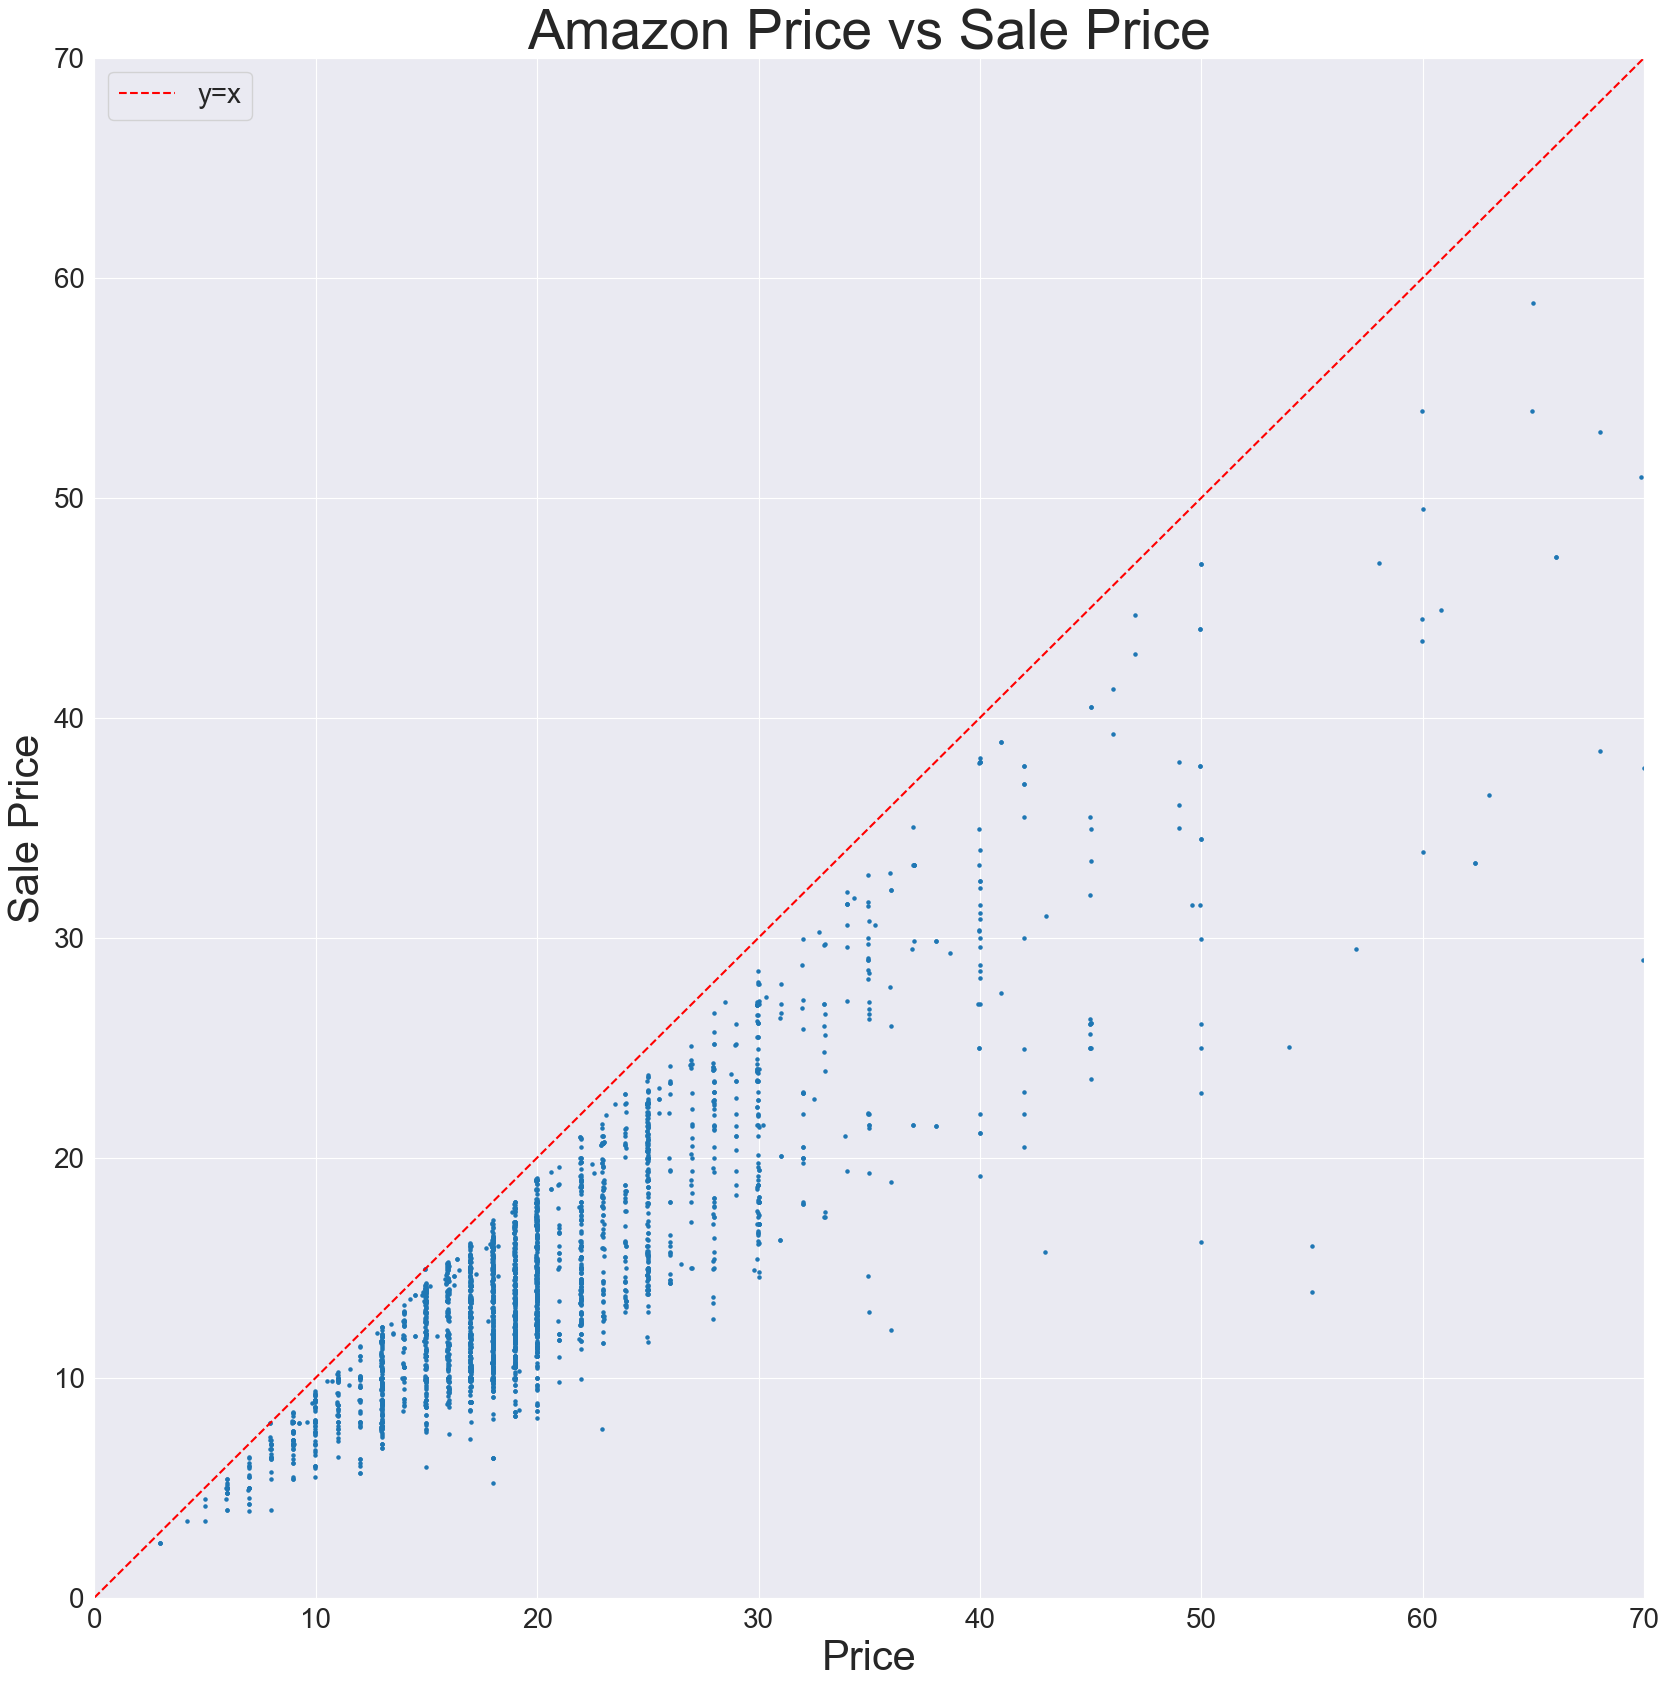

In [24]:
plt.subplots(1, 1, figsize=(20, 20))
dfsamp = df.sample(df.shape[0]//5)
plt.scatter(dfsamp['originalPrice'], dfsamp['newPrice'],s=5)


plt.title("Amazon Price vs Sale Price",fontsize = 40)
plt.xlabel("Price",fontsize = 30)
plt.ylabel("Sale Price",fontsize = 30)

# Convert publish_date to numerical format for regression
x = np.linspace(0, 100, 100)
y = x
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.plot(x, y, 'r--', label='y=x')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=20)



plt.savefig('./pics/publishdate_PricevsOriginPrice.png')

In [33]:

AllRank = []
DepRank = []
for index,row in df.iterrows():
    alrank = str(row['all_rank'])
    alrank = re.sub(r'[#,]','',alrank)
    AllRank.append(alrank)
    depr = str(row['dep_rank'])
    depr = re.sub(r'[#,]','',depr)
    DepRank.append(depr)
AllRank = pd.to_numeric(AllRank,errors='coerce')
DepRank = pd.to_numeric(DepRank,errors='coerce')
df['allRank'] = AllRank
df['depRank'] = DepRank


In [34]:
publish_date = []
for index,row in df.iterrows():
    data = row['format'].split(' – ')
    match = re.search('\((.*?)\)', row['other_list'])
    if match:
        publish_date.append(match.group(1))
    else:
        publish_date.append(np.nan)
df['publish_date'] = publish_date
df['publish_date'] = pd.to_datetime(df['publish_date'], format="%B %d, %Y", errors='coerce').dt.strftime("%Y-%m-%d")
# Replace 'NaT' with np.nan


In [35]:
#start analyze part 
harddf = df[df['format'] == 'Hardcover']
# harddf = harddf[harddf['department1'] == "Business & Money "]


In [36]:
# limit the range of data
harddf['publish_date'] = pd.to_datetime(harddf['publish_date'])
harddf = harddf[harddf['publish_date']>datetime.datetime(2000,1,1)]
harddf = harddf[harddf['allRank']<100000]
harddf = harddf[harddf['newPrice']<150]
harddf = harddf.dropna()

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_60309/3155896433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harddf['publish_date'] = pd.to_datetime(harddf['publish_date'])


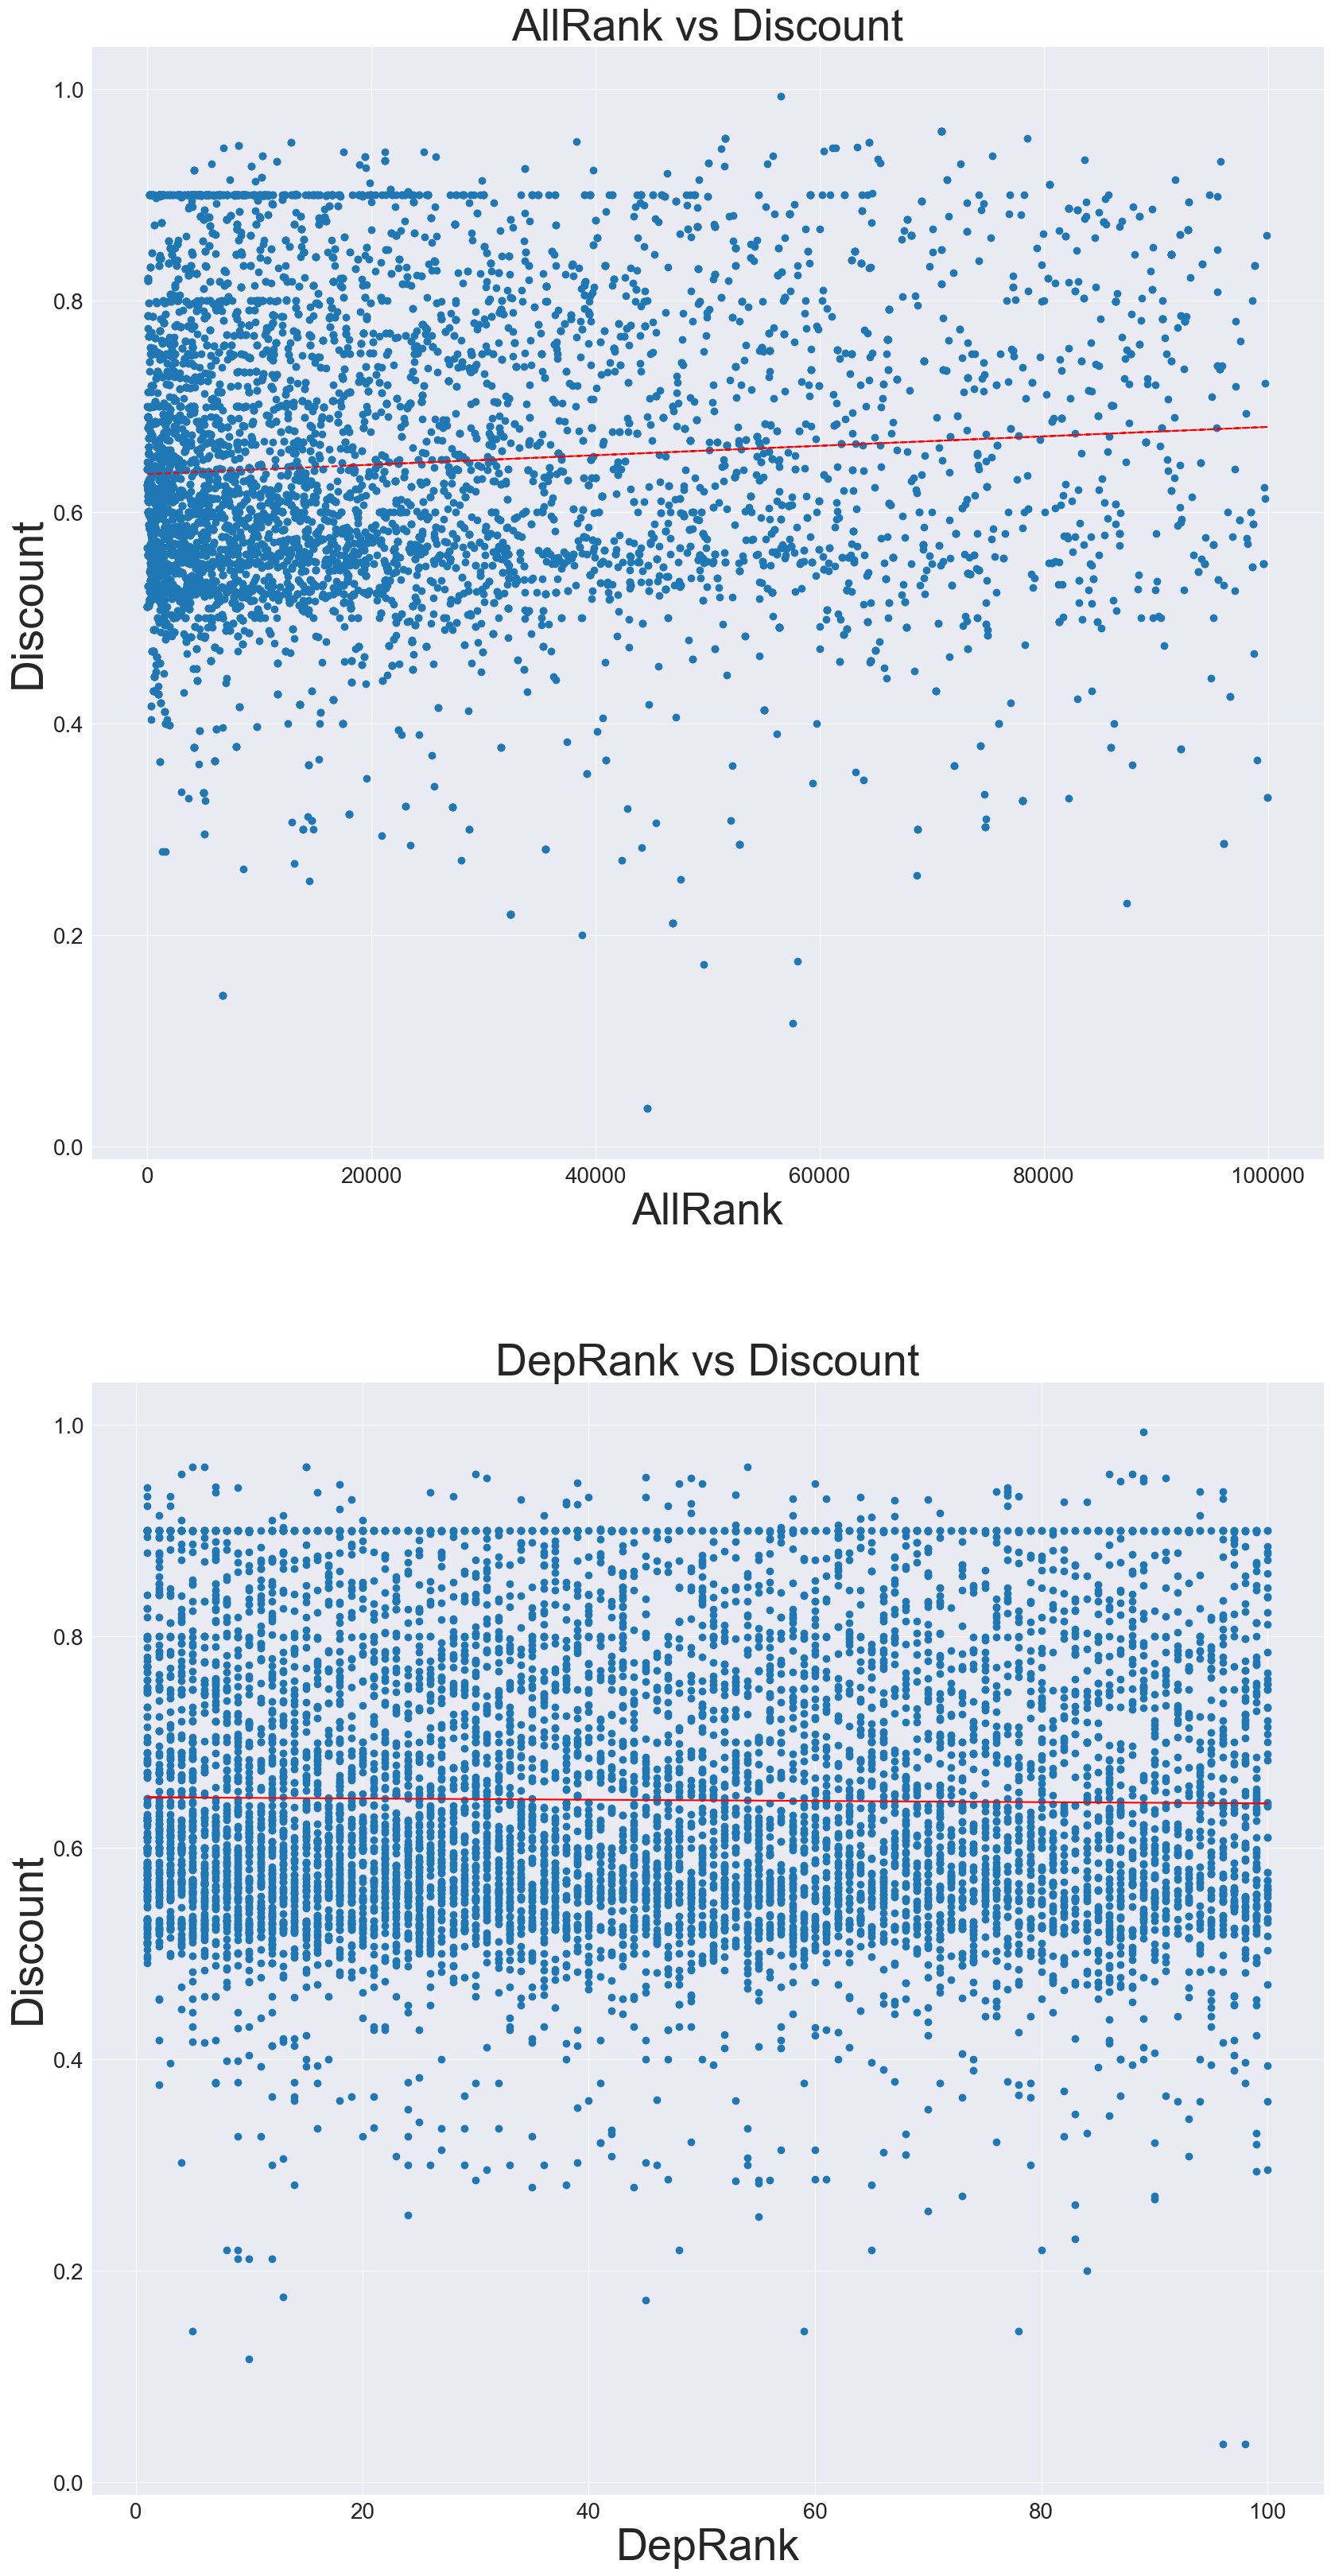

In [37]:
# draw plot of allrank and discount

fig,ax = plt.subplots(2,1,figsize=(20,40))
x = harddf['allRank']
y = harddf['discount']
m, b = np.polyfit(x, y, 1)
y_line = m * x + b
ax[0].plot(x, y_line, 'r--')
ax[0].scatter(harddf['allRank'],harddf['discount'])
ax[0].set_title("AllRank vs Discount",fontsize = 40)
ax[0].set_xlabel("AllRank",fontsize = 40)
ax[0].set_ylabel("Discount",fontsize = 40)
ax[0].tick_params(axis='both', which='major', labelsize=20)

# draw plot of depRank and discount
x = harddf['depRank']
y = harddf['discount']
m, b = np.polyfit(x, y, 1)
y_line = m * x + b
ax[1].plot(x, y_line, color='red')
ax[1].scatter(harddf['depRank'],harddf['discount'])
ax[1].set_title("DepRank vs Discount",fontsize = 40)
ax[1].set_xlabel("DepRank",fontsize = 40)
ax[1].set_ylabel("Discount",fontsize = 40)
ax[1].tick_params(axis='both', which='major', labelsize=20)



plt.savefig("./allrank_discount.png")

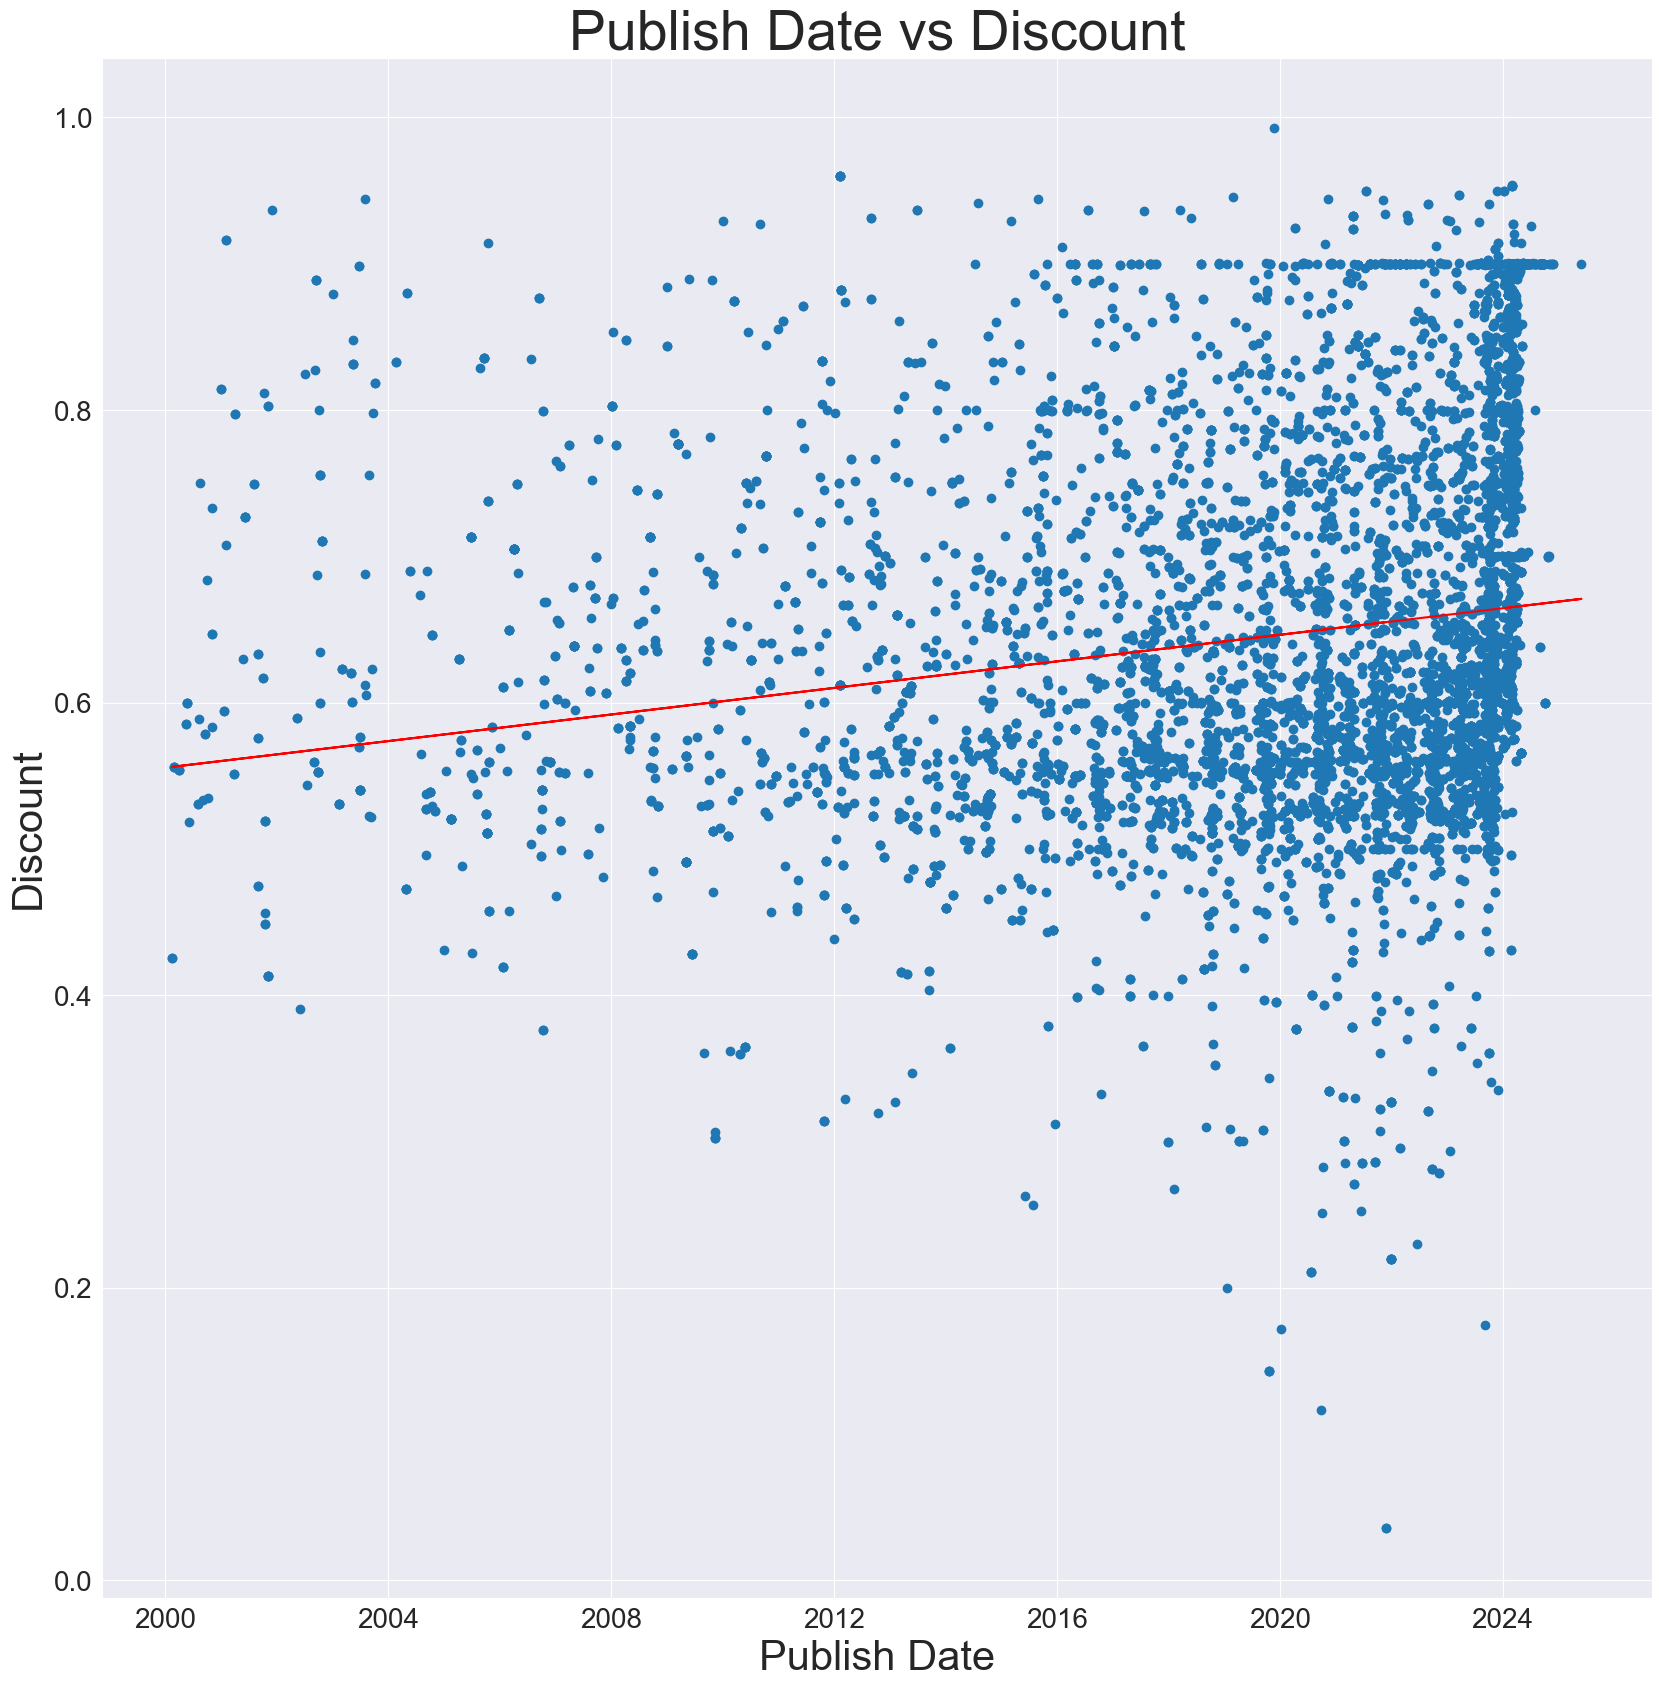

In [38]:
# draw plot of publishDate and discount
plt.subplots(1, 1, figsize=(20, 20))

plt.scatter(harddf['publish_date'], harddf['discount'])


plt.title("Publish Date vs Discount",fontsize = 40)
plt.xlabel("Publish Date",fontsize = 30)
plt.ylabel("Discount",fontsize = 30)

# Convert publish_date to numerical format for regression
x = mdates.date2num(harddf['publish_date'])
y = harddf['discount']
m, b = np.polyfit(x, y, 1)
y_line = m * x + b
plt.plot(x, y_line, color='red')
plt.tick_params(axis='both', which='major', labelsize=20)



plt.savefig('./pics/publishdate_discount.png')




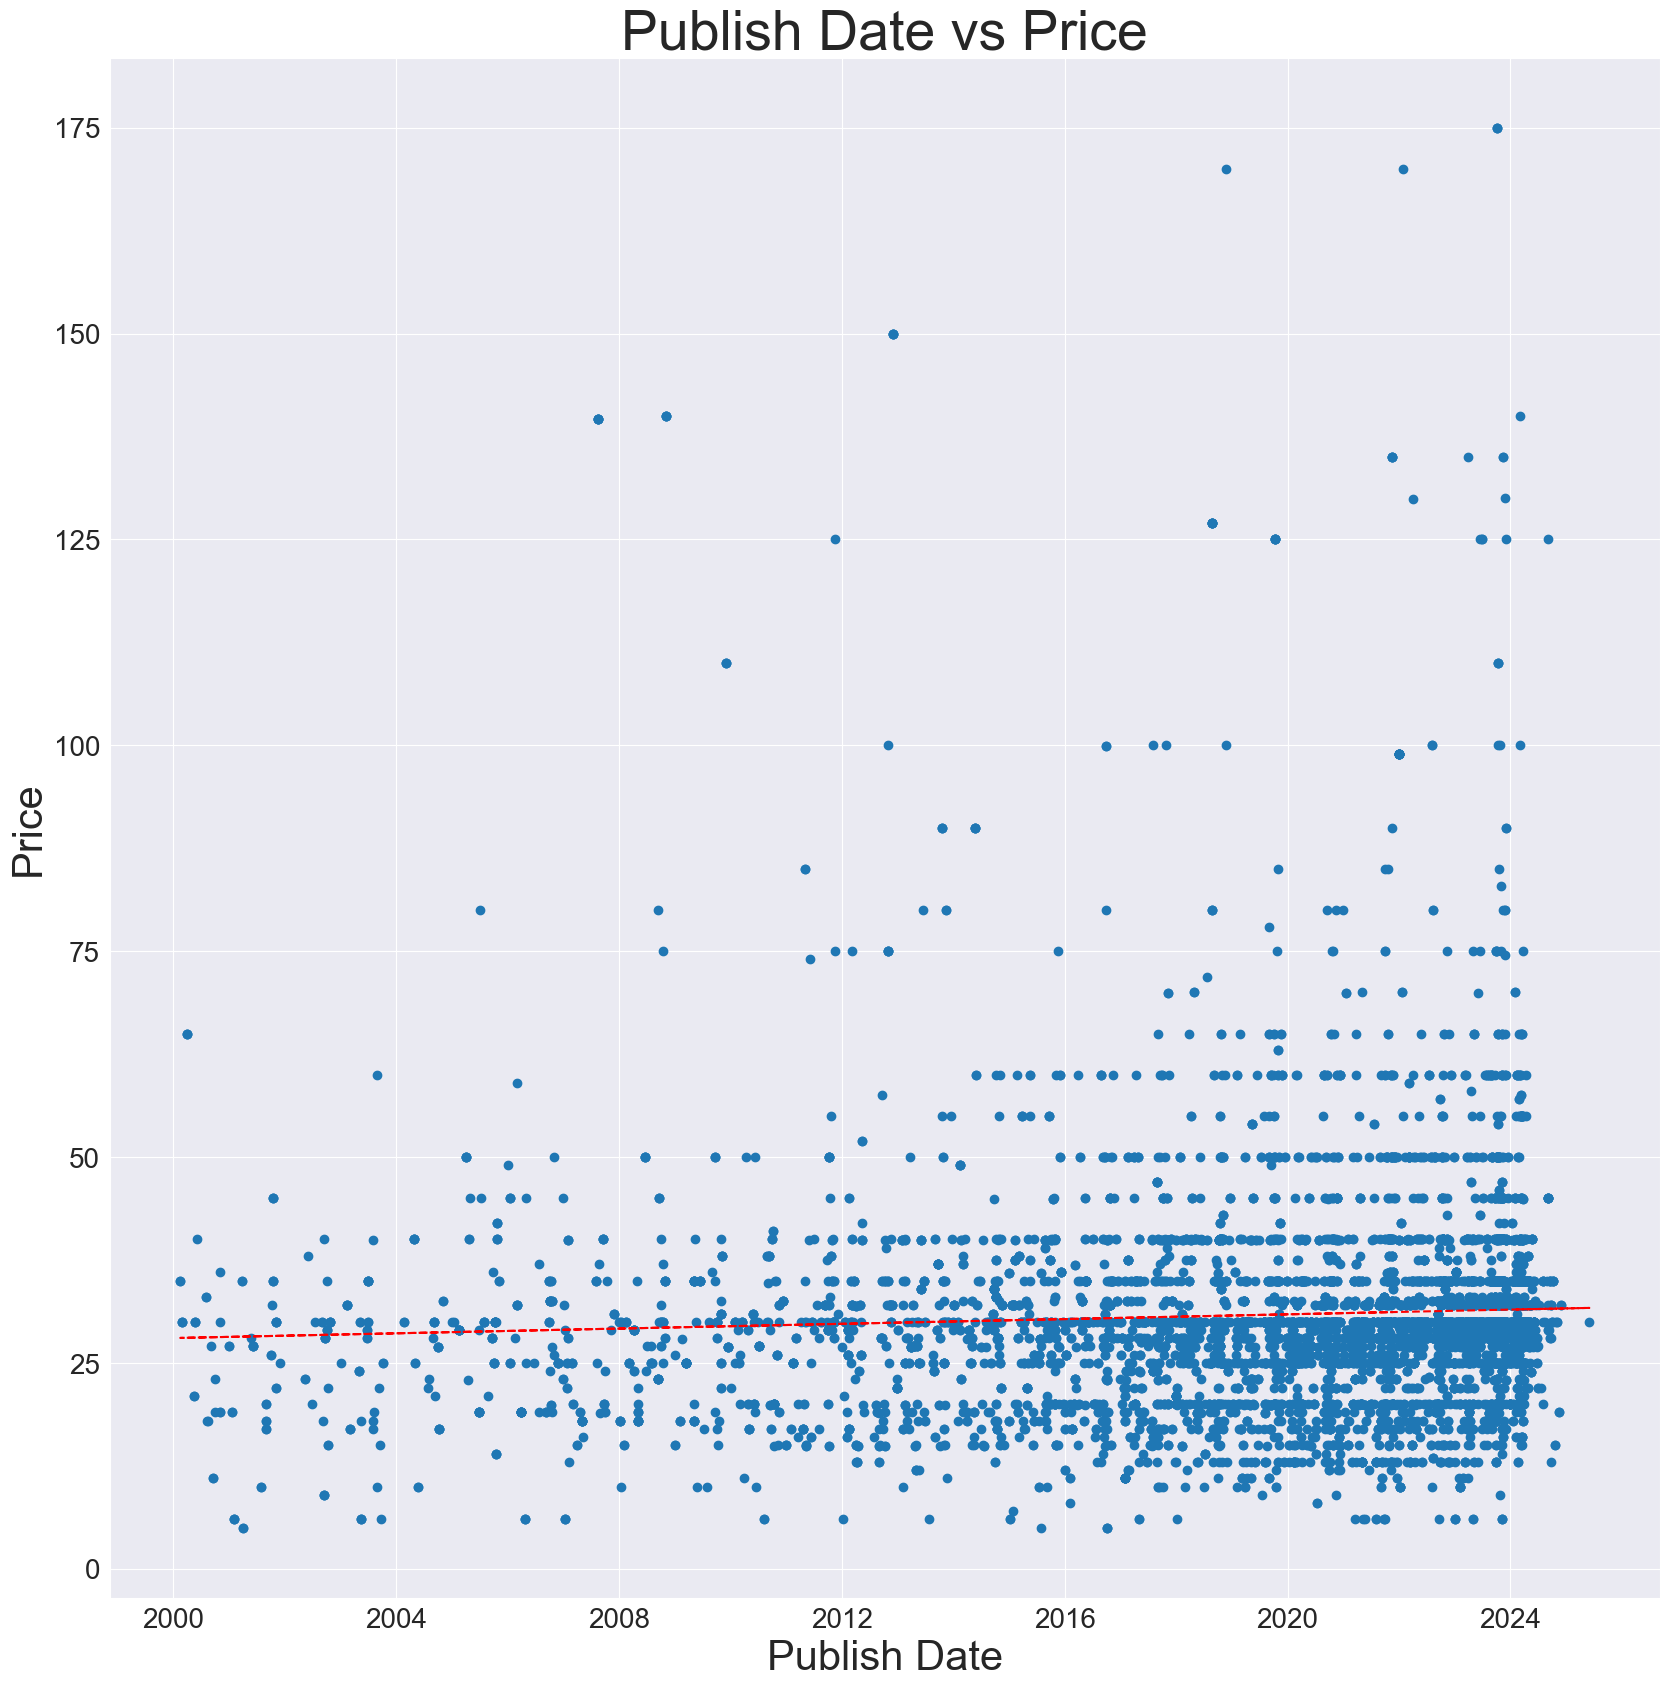

In [39]:
plt.subplots(1, 1, figsize=(20, 20))

plt.scatter(harddf['publish_date'], harddf['originalPrice'])


plt.title("Publish Date vs Price",fontsize = 40)
plt.xlabel("Publish Date",fontsize = 30)
plt.ylabel("Price",fontsize = 30)

# Convert publish_date to numerical format for regression
x = mdates.date2num(harddf['publish_date'])
y = harddf['originalPrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.tick_params(axis='both', which='major', labelsize=20)



plt.savefig('./pics/publishdate_OriginalPrice.png')
plt.show()

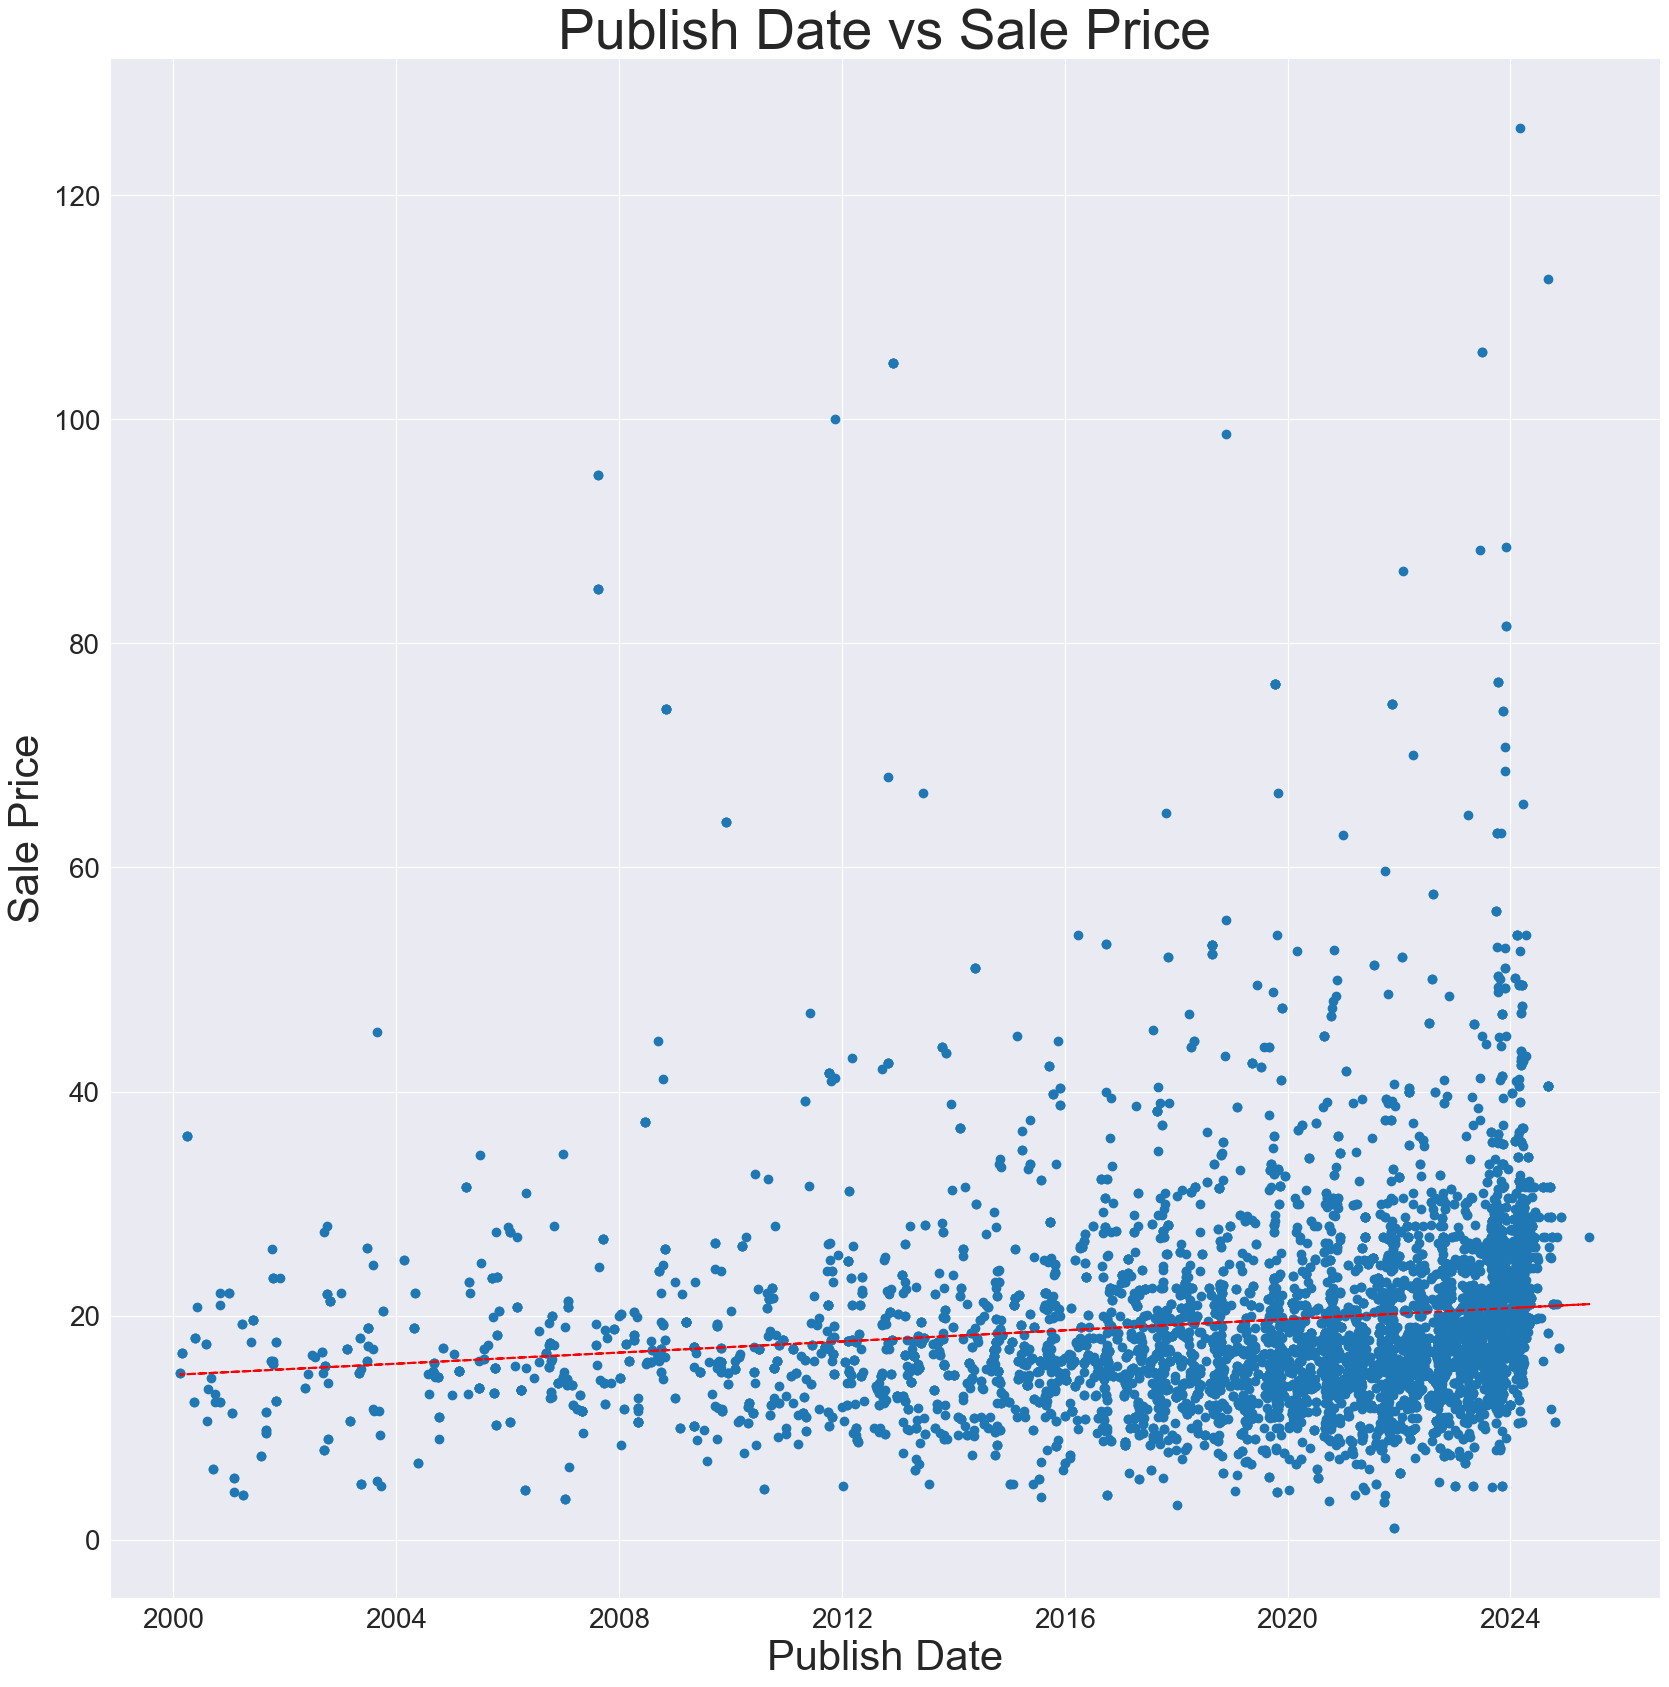

In [40]:
plt.subplots(1, 1, figsize=(20, 20))

plt.scatter(harddf['publish_date'], harddf['newPrice'])


plt.title("Publish Date vs Sale Price",fontsize = 40)
plt.xlabel("Publish Date",fontsize = 30)
plt.ylabel("Sale Price",fontdict={'fontsize': 30})

# Convert publish_date to numerical format for regression
x = mdates.date2num(harddf['publish_date'])
y = harddf['newPrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.tick_params(axis='both', which='major', labelsize=20)



plt.savefig('./pics/publishdate_SalePrice.png')
plt.show()

In [41]:
ebookdf = df[df['format'] == 'Kindle Edition']
# ebookdf = ebookdf[ebookdf['department1'] == "Business & Money "]

In [42]:
hardoprice = []
hardnprice = []
titlelist = harddf['title'].tolist()
edflen = len(ebookdf)
for e_index,e_row in ebookdf.iterrows():
    print("finished: ",e_index,"/",edflen,"  ",end="\r")
    if e_row['title'] in titlelist:
        index = titlelist.index(e_row['title'])
        hardoprice.append(harddf.iloc[index]['originalPrice'])
        hardnprice.append(harddf.iloc[index]['newPrice'])
    else:
        hardnprice.append(np.nan)
        hardoprice.append(np.nan)
    
ebookdf['hardOriginalPrice'] = hardoprice
ebookdf['hardNewPrice'] = hardnprice
edf = ebookdf.dropna()

2728 / 29903   finished:  15275 / 29903   finished:  18128 / 29903   finished:  20399 / 29903   finished:  23260 / 29903   finished:  26065 / 29903   finished:  27902 / 29903   finished:  29642 / 29903   finished:  31603 / 29903    29903   finished:  37809 / 29903   finished:  39982 / 29903   finished:  42026 / 29903   finished:  44255 / 29903   finished:  46658 / 29903   finished:  49512 / 29903   finished:  51726 / 29903   finished:  54589 / 29903   finished:  57088 / 29903   finished:  59649 / 29903   finished:  62655 / 29903   finished:  65044 / 29903   finished:  68212 / 29903   finished:  71490 / 29903   finished:  73116 / 29903   finished:  75379 / 29903   finished:  78305 / 29903   finished:  80697 / 29903   finished:  83316 / 29903   finished:  86249 / 29903   finished:  89202 / 29903   finished:  91603 / 29903   finished:  94851 / 29903   finished:  99239 / 29903   finished:  102002 / 29903   finished:  104735 / 29903   finished:  106825 / 29903   

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_60309/2454781247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebookdf['hardOriginalPrice'] = hardoprice
/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_60309/2454781247.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebookdf['hardNewPrice'] = hardnprice


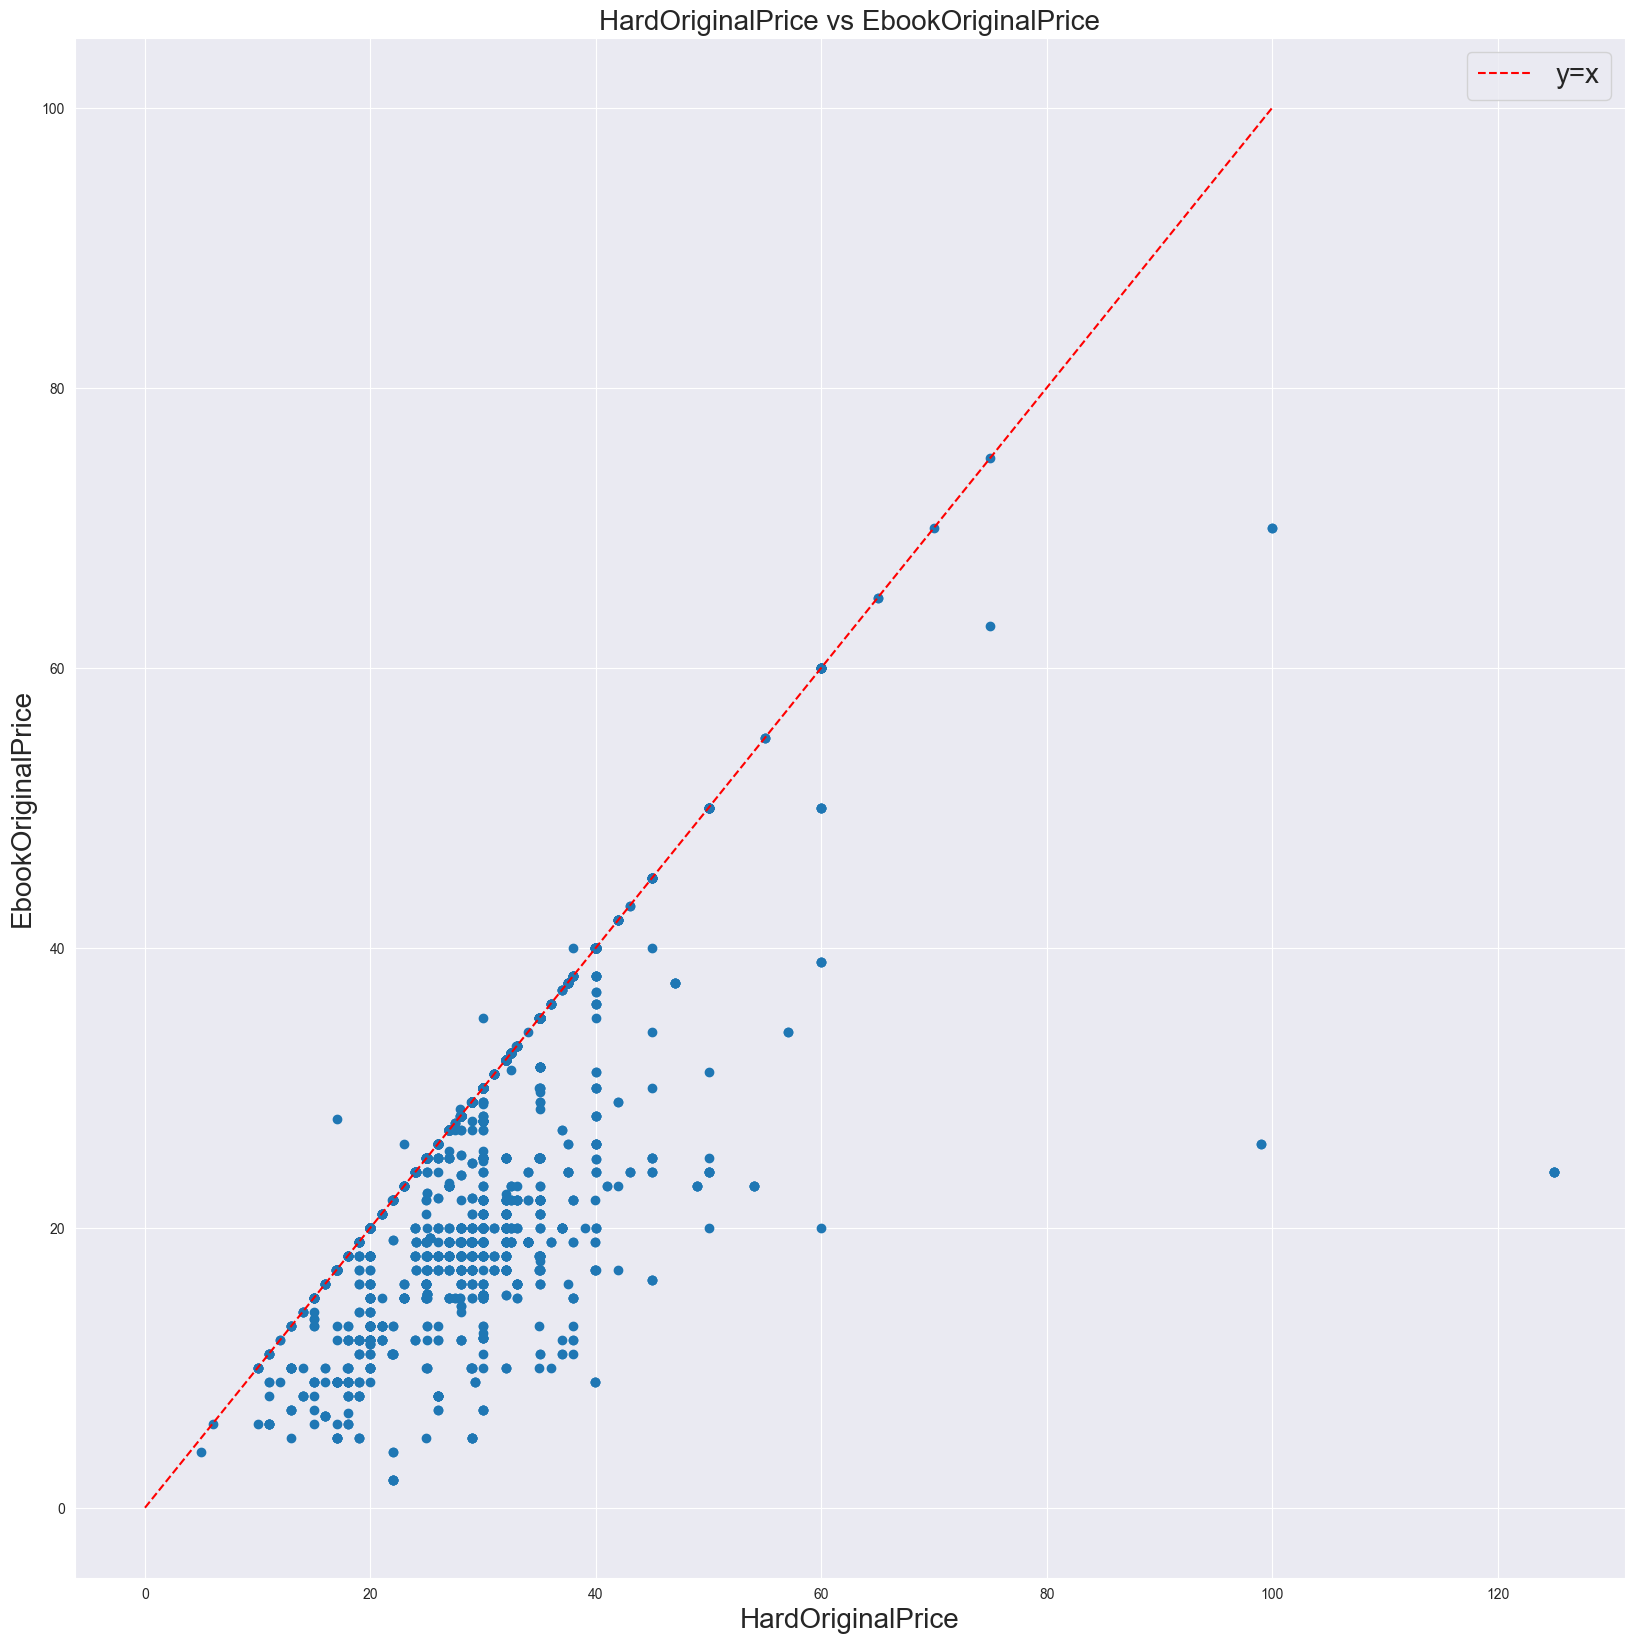

In [43]:
plt.figure(figsize=(20,20))
plt.scatter(edf['hardOriginalPrice'],edf['originalPrice'])
plt.xlabel("HardOriginalPrice",fontsize=20)
plt.ylabel("EbookOriginalPrice",fontsize=20)
x = np.linspace(0,100,100)
y = x
plt.plot(x,y,"r--",label="y=x")
plt.legend(fontsize = 20)
plt.title("HardOriginalPrice vs EbookOriginalPrice",fontsize=20)
plt.savefig("./pics/hard_ebook_original_price.png",dpi=300)

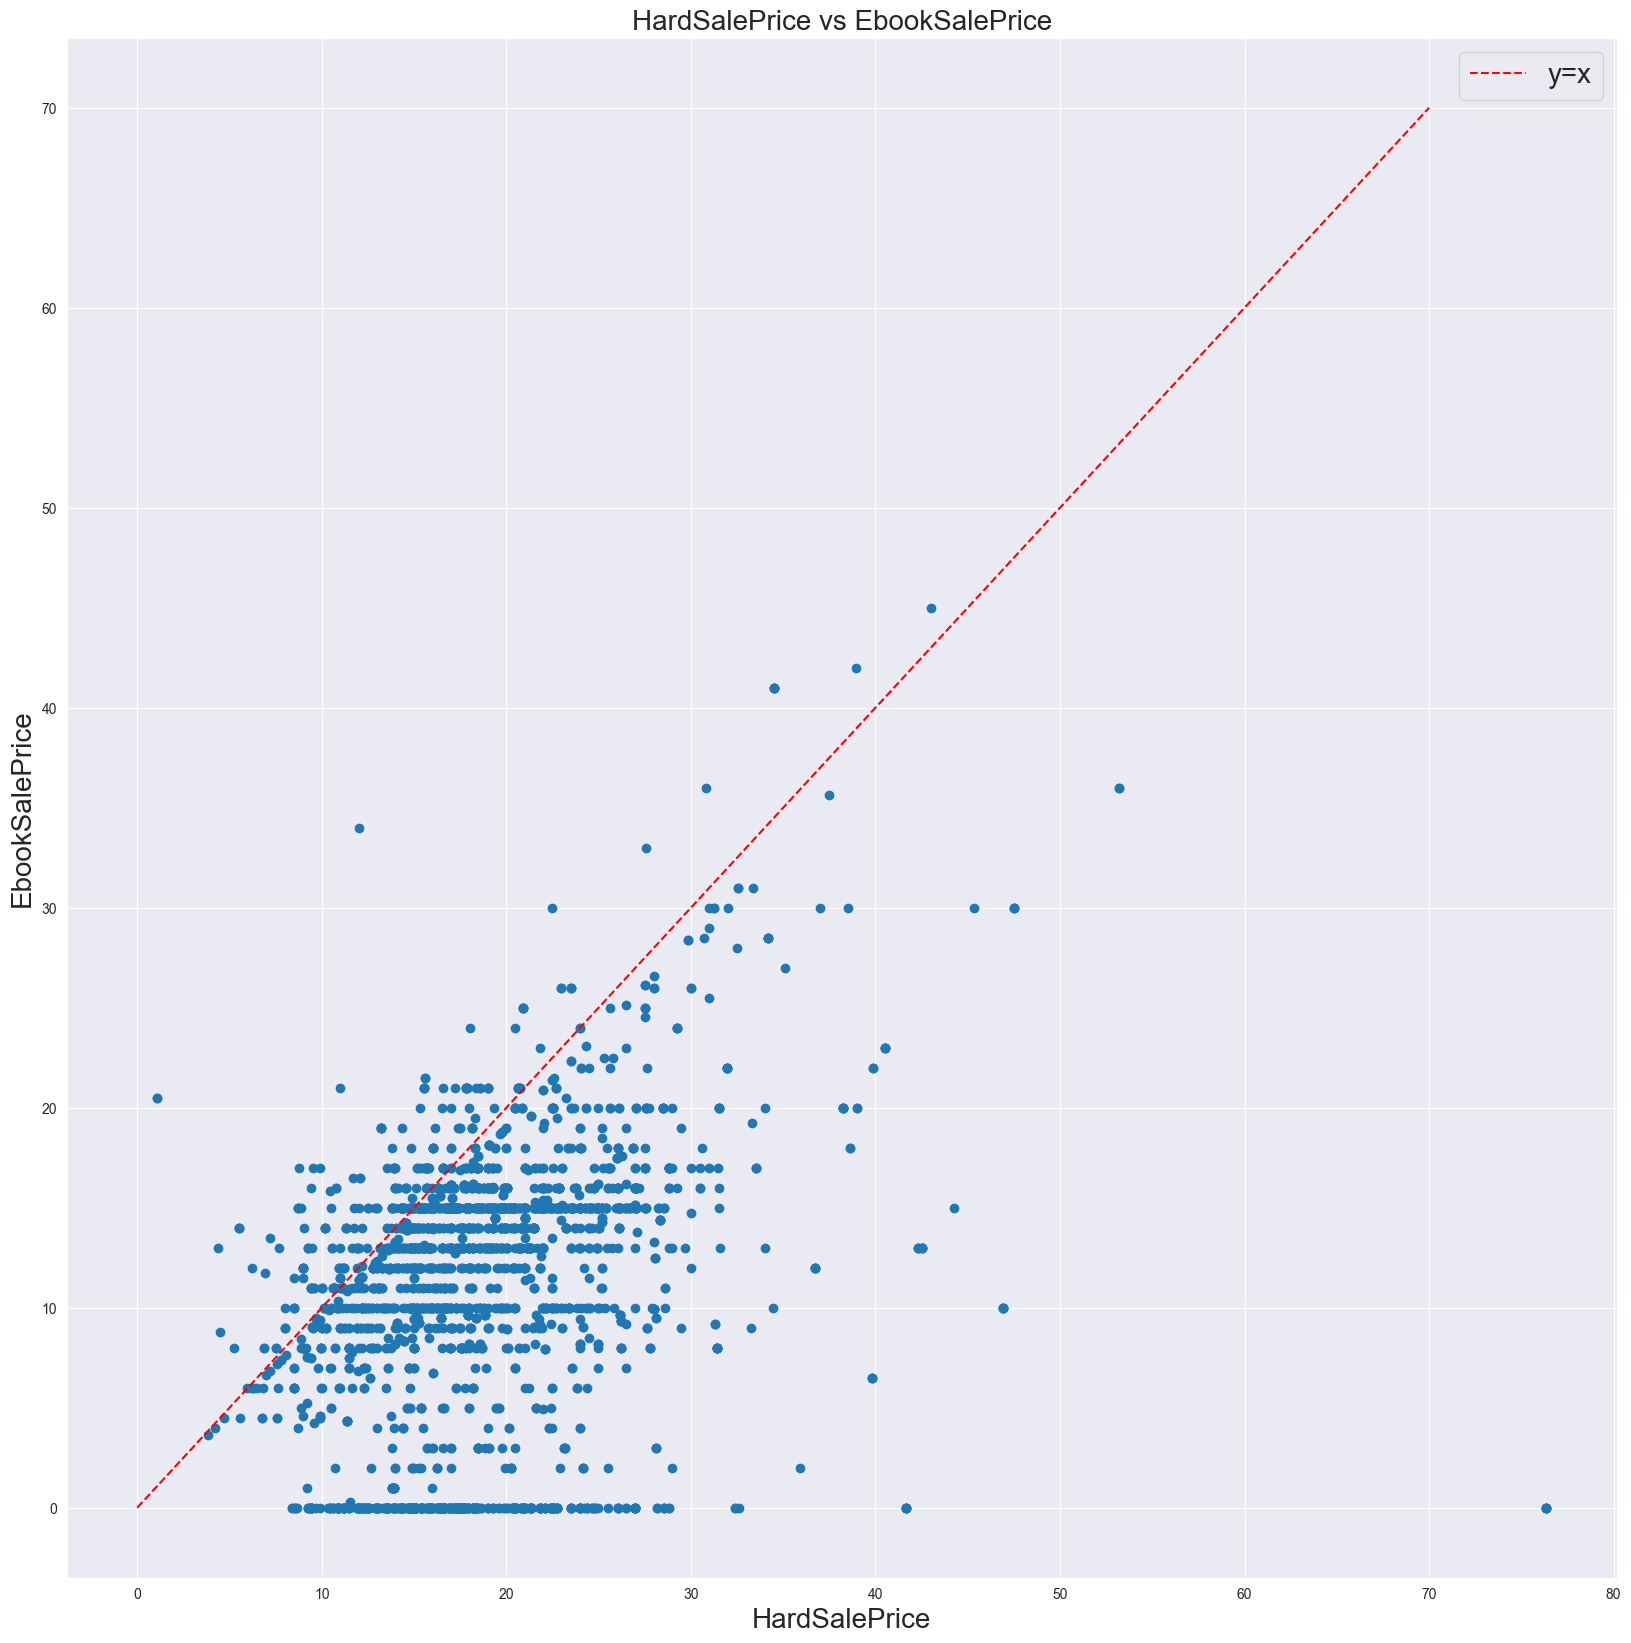

In [44]:
plt.figure(figsize=(20,20))
plt.scatter(edf['hardNewPrice'],edf['newPrice'])
plt.xlabel("HardSalePrice",fontsize=20)
plt.ylabel("EbookSalePrice",fontsize=20)
x = np.linspace(0,70,100)
y = x
plt.plot(x,y,"r--",label="y=x")
plt.legend(fontsize=20)
plt.title("HardSalePrice vs EbookSalePrice",fontsize=20)
plt.savefig("./pics/hard_ebook_sale_price.png",dpi=300)


/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_60309/930586061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paperdf['publish_date'] = pd.to_datetime(paperdf['publish_date'])


(16071.0, 20089.0)

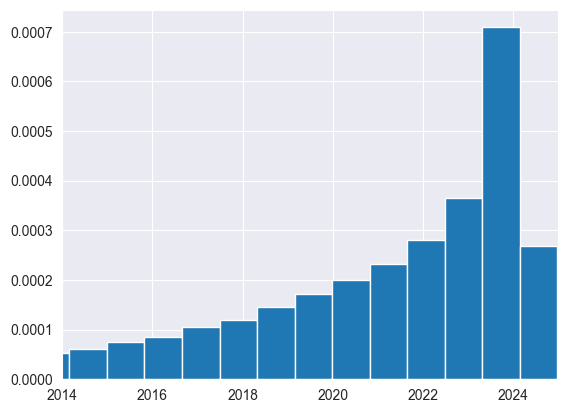

In [55]:
paperdf = df[df['format'] == 'Paperback']
paperdf['publish_date'] = pd.to_datetime(paperdf['publish_date'])
paperdf = paperdf[paperdf['publish_date']>datetime.datetime(2000,1,1)]
paperdf = paperdf[paperdf['publish_date']<datetime.datetime(2025,1,1)]

plt.hist(paperdf['publish_date'],bins=30,density=True)
plt.xlim(datetime.datetime(2014,1,1),datetime.datetime(2025,1,1))

In [47]:
harddf = harddf[harddf['publish_date']>datetime.datetime(2000,1,1)]